**K-Means Clustering**

K-Means is an unsupervised learning algorithm used for clustering data into K distinct groups based on feature similarity. It is widely used in customer segmentation, image compression, and anomaly detection.



In [7]:
import plotly.express as px
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

In [8]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.concat([
    (pd.DataFrame(data=iris['data'], columns=iris['feature_names'])),
     (pd.DataFrame(data=iris['target'], columns=['target']))],
               axis=1)
df.replace({'target':{0:'setosa', 1:'versicolor', 2:'virginica'}}, inplace = True)

In [9]:
# the elbow method
x = df.iloc[:, [0, 1, 2, 3]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state =2041)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [10]:
fig = px.line(df, x=range(1, 11), y=wcss)
fig.show()

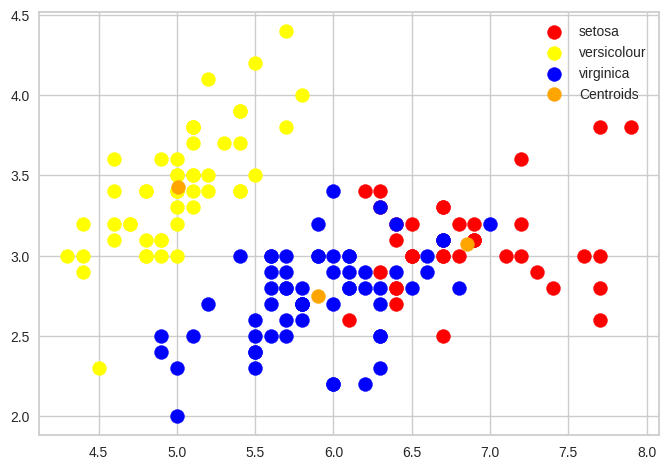

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state =2041 )
y_kmeans = kmeans.fit_predict(x)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red', label = 'setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'yellow', label = 'versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'blue', label = 'virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'orange', label = 'Centroids')
plt.legend()

In [12]:
kmeans.fit(x)
sepal_length = float(input("Enter Sepal Length (in cm): "))
sepal_width = float(input("Enter Sepal Width (in cm): "))
petal_length = float(input("Enter Petal Length (in cm): "))
petal_width = float(input("Enter Petal Width (in cm): "))
new_data = np.array([sepal_length, sepal_width, petal_length, petal_width]).reshape(1, -1)
new_cluster_assignment = kmeans.predict(new_data)
print("Predicted cluster assignment:", new_cluster_assignment[0])

Enter Sepal Length (in cm): 2.6
Enter Sepal Width (in cm): 2
Enter Petal Length (in cm): 1.5
Enter Petal Width (in cm): 1.9
Predicted cluster assignment: 1


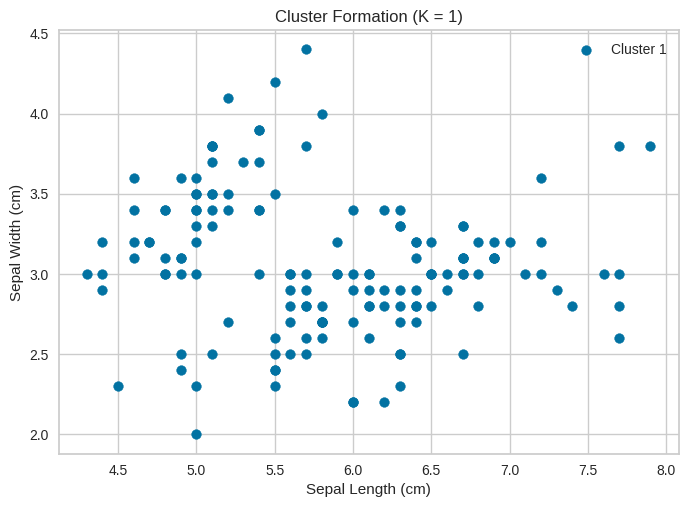

In [13]:
import warnings
warnings.filterwarnings("ignore")
#formation of clusters with varied values of 'k'
from matplotlib.animation import FuncAnimation
X = iris.data
y = iris.target
max_clusters = 10
fig, ax = plt.subplots()
def update(frame):
    ax.clear()
    kmeans = KMeans(n_clusters=frame + 1, random_state=2401)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    for cluster in range(frame + 1):
        ax.scatter(X[cluster_labels == cluster, 0], X[cluster_labels == cluster, 1], label=f'Cluster {cluster + 1}')
        ax.set_title(f'Cluster Formation (K = {frame + 1})')
        ax.set_xlabel('Sepal Length (cm)')
        ax.set_ylabel('Sepal Width (cm)')
        ax.legend(loc='upper right')
ani = FuncAnimation(fig, update, frames=max_clusters, repeat=False)
from IPython.display import HTML
HTML(ani.to_jshtml())
#ani.save('cluster_formation.mp4', writer='ffmpeg', fps=2)